In [2]:
%matplotlib inline
import gdal
import numpy as np
from matplotlib.pyplot import imread
import numpy as np
from skimage import io
import scipy.stats
import os
import seaborn as sns
import matplotlib.pyplot as plt
#img = io.imread('image.png', as_gray=True)
import pandas as pd
input_path100_7="E:/Thesis/Data/roads_100_7_SYL/"
input_path50_7="E:/Thesis/Data/roads_50_7_SYL/"
input_path100_10="E:/Thesis/Data/roads_100_10_SYL/"
input_path50_10="E:/Thesis/Data/roads_50_10_SYL/"
table={}
table['spearmanrC']=list()

In [3]:
t1={}

In [4]:
def TestAndAppend(Image_x,Image_y):
    SC,SP=scipy.stats.spearmanr(Image_x, Image_y, axis=None)
    if(np.isnan(SC)):
        table['spearmanrC'].append(-2.0)
    else:
        table['spearmanrC'].append(SC)


In [5]:
def DF(table):
    df=pd.DataFrame.from_dict(table)
    print(df.shape)
    print(df.describe())
    print(df.head())
    return df
def HIST_null(df):
    df.spearmanrC.hist()
    df1=df.groupby('spearmanrC').size().reset_index(name='Size')
    return df1
def HIST(df):
    df=df.drop(df.index[0])
    df.spearmanrC.hist()
    return df


In [6]:
def TEST(x,y,z,input_path):
    for i in range(0,y,x):
         for j in range(0,z,x):
            Image_x  = io.imread(input_path+"tile_"+str(i)+"_"+str(j)+".tif",as_gray=True)
            Image_y = io.imread(input_path+"gtile_"+str(i)+"_"+str(j)+".tif",as_gray=True)
            TestAndAppend(Image_x,Image_y)

In [7]:
table['spearmanrC'].clear()
TEST(50,651,451,input_path50_7)

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\ASUS\anaconda3\envs\TensorFlow-GPU\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\ASUS\anaconda3\envs\TensorFlow-GPU\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\ASUS\anaconda3\envs\TensorFlow-GPU\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(140, 1)
       spearmanrC
count  140.000000
mean    -0.964410
std      1.211605
min     -2.000000
25%     -2.000000
50%     -2.000000
75%      0.388495
max      0.933977
   spearmanrC
0        -2.0
1        -2.0
2        -2.0
3        -2.0
4        -2.0


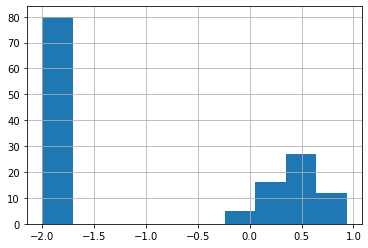

In [8]:
#df.pearsonrC.hist()
df=DF(table)
df51_7=HIST_null(df)


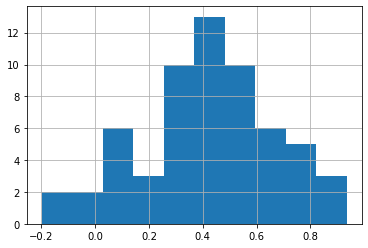

In [9]:
df52_7=HIST(df51_7)

In [10]:
table['spearmanrC'].clear()
TEST(50,651,451,input_path50_10)

(140, 1)
       spearmanrC
count  140.000000
mean    -0.544671
std      1.077633
min     -2.000000
25%     -2.000000
50%      0.143211
75%      0.275950
max      0.706751
   spearmanrC
0   -2.000000
1    0.706751
2    0.088434
3    0.119426
4    0.233674


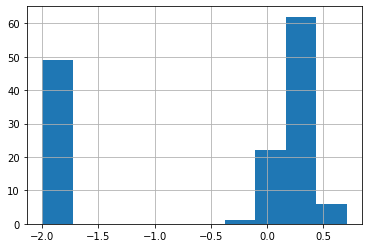

In [11]:
df50_10=DF(table)
df51_10=HIST_null(df50_10)



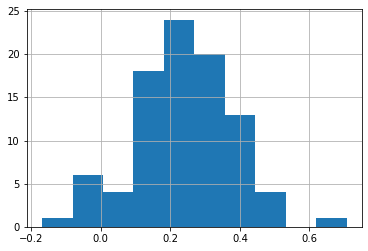

In [12]:
df52_10=HIST(df51_10)

In [13]:
table['spearmanrC'].clear()
TEST(100,601,401,input_path100_7)

(35, 1)
       spearmanrC
count   35.000000
mean    -0.295538
std      1.107953
min     -2.000000
25%     -2.000000
50%      0.283072
75%      0.421563
max      0.817608
   spearmanrC
0    0.331528
1   -2.000000
2    0.156344
3    0.419724
4    0.382486


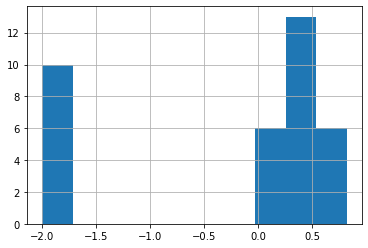

In [14]:
df100_7=DF(table)
df101_7=HIST_null(df100_7)


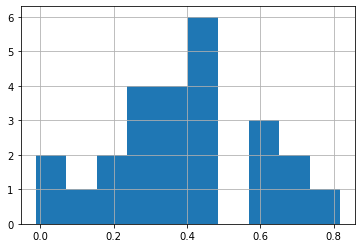

In [15]:
df102_7=HIST(df101_7)

In [16]:
table['spearmanrC'].clear()
TEST(100,601,401,input_path100_10)

(35, 1)
       spearmanrC
count   35.000000
mean    -0.183024
std      0.928201
min     -2.000000
25%      0.047570
50%      0.217429
75%      0.318063
max      0.521853
   spearmanrC
0    0.361157
1    0.081101
2    0.312879
3    0.337347
4    0.209178


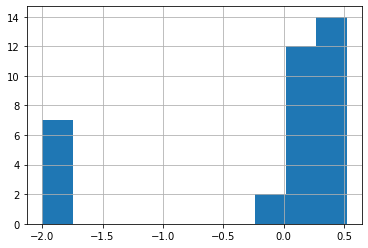

In [17]:
df100_10=DF(table)
df101_10=HIST_null(df100_10)


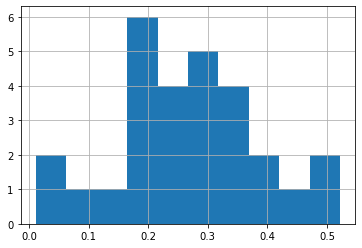

In [18]:
df102_10=HIST(df101_10)

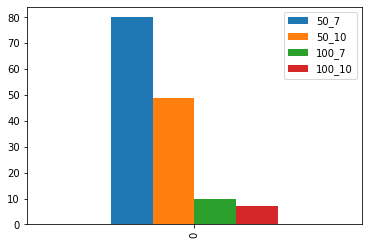

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
a=df51_7['Size'].iloc[0]
b=df51_10['Size'].iloc[0]
c=df101_7['Size'].iloc[0]
e=df101_10['Size'].iloc[0]
d =[ {
  "50_7": a,
  "50_10":b,
  "100_7":c,
"100_10":e
}]
pd.DataFrame(d, index=[0]).plot(kind='bar')
plt.show()

Text(0.5, 1.0, 'KDE for different Zoom level & grid')

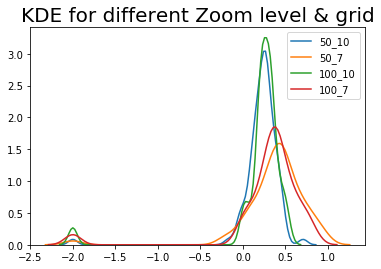

In [20]:
ay=sns.kdeplot(df51_10.spearmanrC,label="50_10")
ay=sns.kdeplot(df51_7.spearmanrC,label="50_7")
ay=sns.kdeplot(df101_10.spearmanrC,label="100_10")
ay=sns.kdeplot(df101_7.spearmanrC,label="100_7")
plt.title("KDE for different Zoom level & grid",fontsize = 20)



Text(0.5, 1, 'Range_Size_50_7')

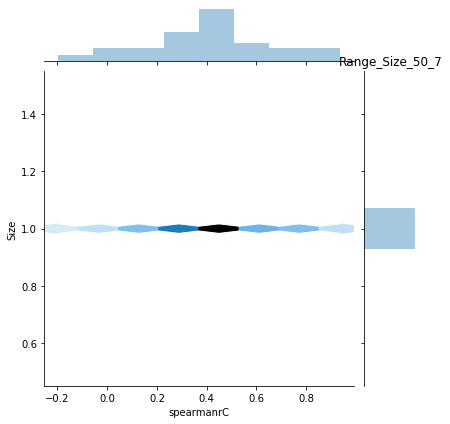

In [21]:
sns.jointplot(x='spearmanrC',y='Size',data=df52_7,kind='hex')
plt.title("Range_Size_50_7")

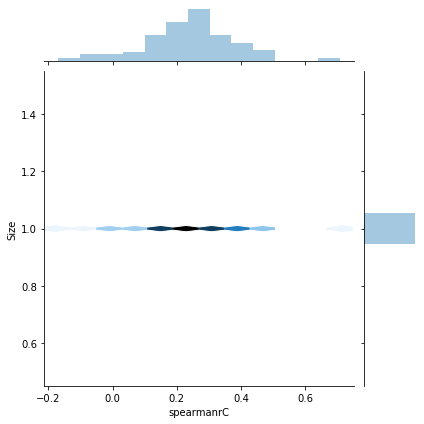

In [22]:
sns.jointplot(x='spearmanrC',y='Size',data=df52_10,kind='hex')

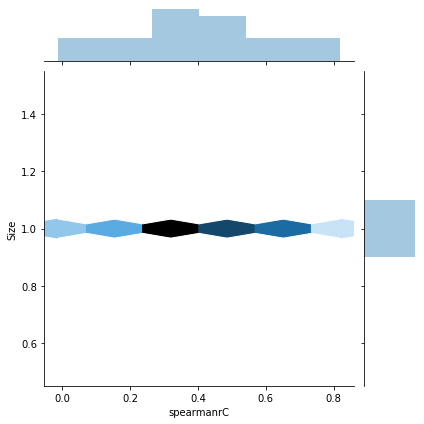

In [23]:
sns.jointplot(x='spearmanrC',y='Size',data=df102_7,kind='hex')

Text(0.5, 1.0, 'Range_Size_50_7')

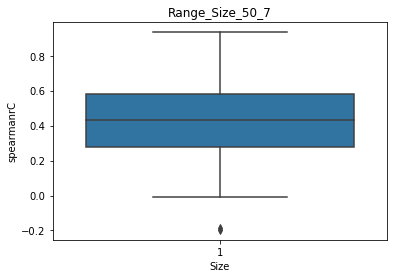

In [24]:
sns.boxplot('Size','spearmanrC',data=df52_7)
plt.title("Range_Size_50_7")

Text(0.5, 1.0, 'Range_Size_50_10')

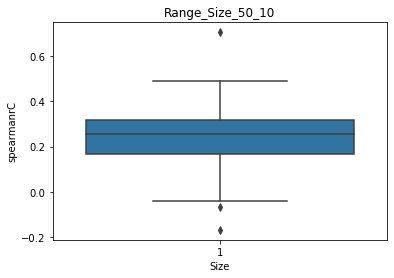

In [25]:
sns.boxplot('Size','spearmanrC',data=df52_10)
plt.title("Range_Size_50_10")

Text(0.5, 1.0, 'Range_Size_100_10')

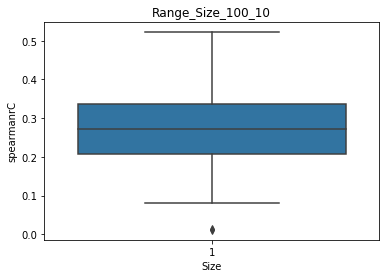

In [26]:
sns.boxplot('Size','spearmanrC',data=df102_10)
plt.title("Range_Size_100_10")

Text(0.5, 1.0, 'Range_Size_100_7')

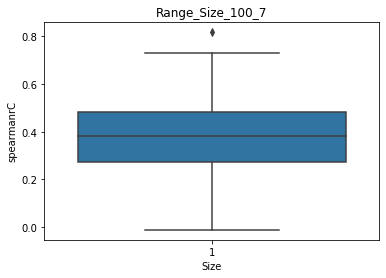

In [27]:
sns.boxplot('Size','spearmanrC',data=df102_7)
plt.title("Range_Size_100_7")

